In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

img1 = plt.imread('box_left_2k.jpg')
img2 = plt.imread('box_right_2k.jpg')

pts1 = np.array([[1148, 351], [1441, 481], [1427, 662], [1172, 525], [1524,80], [1795,134], [1744,307],
        [1564, 320], [1579, 306], [1584, 288]])

pts2 = np.array([[747, 397], [944,522], [1010,704], [822,558], [1212,116], [1440,170], [1433,350],
        [1131,360], [1152,342], [1166,326]])

K1 = np.array([[1062.04, 0, 1098.52], [0, 1061.74, 599.665], [0, 0, 1]])
K2 = np.array([[1060.59, 0, 1127.03], [0, 1060.06, 645.711], [0, 0, 1]])

# TODO 1 (15 points): Normalize image points.
#        There is no need to use for loops in this task. If you use for loops in this task, you can get at most 10 point.

def nor_p(pts):
    #找到origin
    p_mean = np.mean(pts, axis=0)#對pts[0],pts[1]分別做平均。如果沒有axis=0，python 會把pts[0]，pts[1]加起來一起平均。
    #計算每一個點到origin之間的差距qi
    q = pts - p_mean
    #計算每一個點到origin間的平均距離sigma(||qi||)/n
    meandist = np.mean(np.sqrt(np.sum(q**2, axis=1)))
    #s * sigma(||qi||)/n = sqrt(2)
    #>>
    #s = sqrt(2)/(sigma(||qi||)/n)
    s = np.sqrt(2) / meandist
    #tx = p_mean[0], ty = p_mean[1]
    T = np.array([[s, 0, -s*p_mean[0]], [0, s, -s*p_mean[1]], [0, 0, 1]])
    #The ith point in pts1_normal is given by s*qi.
    pts_norm = s * q
    return pts_norm, T

pts1_nor, T1 = nor_p(pts1)
pts2_nor, T2 = nor_p(pts2)

print(f"Display the mean distance of the image points in pts1_normal from the origin.: {np.mean(np.sqrt(np.sum(pts1_nor**2, axis=1)))}")

# TODO 2 (25 points): Compute the fundamental matrix F.

n = pts1.shape[0]
A = np.zeros((n, 9))
for i in range(n):
    x1, y1 = pts1_nor[i]
    x2, y2 = pts2_nor[i]
    #照著 page 13 of 08 Two-View Geometry.pdf.的格式
    A[i] = [x2*x1, x2*y1, x2, y2*x1, y2*y1, y2, x1, y1, 1]
# print(A)

#page 14 of 08 Two-View Geometry.pdf
U, S, Vt = np.linalg.svd(A)
#Let f be the last column of V.
#reshape to (3, 3)
F = Vt[-1].reshape(3, 3)

#F = U, S, Vt
U, S, Vt = np.linalg.svd(F)
S[2] = 0
# F = U, diag(a1, a2, 0), Vt
F = U @ np.diag(S) @ Vt
#F = T2.T, F, T1
F = T2.T @ F @ T1

errore = 0
for i in range(n):
    x1, y1 = pts1[i]
    x2, y2 = pts2[i]
    # sigma([xi', yi', 1] @ F @ [xi, yi, 1]) 
    errore += abs(np.array([x2, y2, 1]) @ F @ np.array([x1, y1, 1]))
print(f"Epipolar error: {errore:.3f}")





Display the mean distance of the image points in pts1_normal from the origin.: 1.4142135623730951
Epipolar error: 0.194


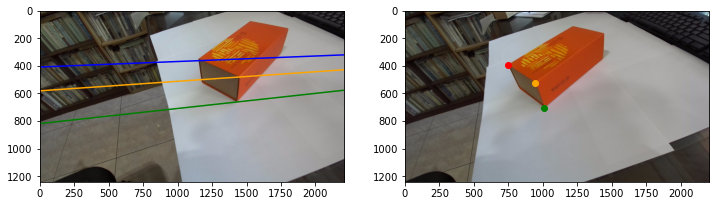

In [40]:
# TODO 3 (15 points): Draw epipolar lines in image1.

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img1)
ax[1].imshow(img2)
for i in range(3):
    x, y = pts2[i]
    if i == 0:
        ax[1].scatter(x, y, color='red')
    elif i == 1:
        ax[1].scatter(x, y, color='orange')
    else:
        ax[1].scatter(x, y, color='green')
    #計算對應的epolar line
    l = F.T @ np.array([x, y, 1])
    xs = np.array([0, img1.shape[1]-1])
    ys = (-l[2] - l[0]*xs) / l[1]

    if i == 0:
        ax[0].plot(xs, ys, color='blue')
    elif i == 1:
        ax[0].plot(xs, ys, color='orange')
    else:
        ax[0].plot(xs, ys, color='green')

plt.show()



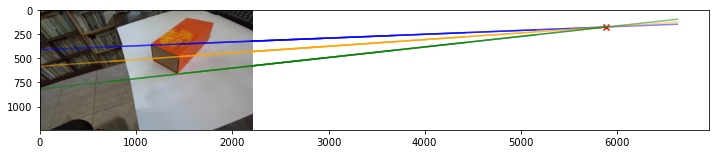

In [41]:
# TODO 4 (10 points): Draw the epipole and epipolar lines in image1.

fig, ax = plt.subplots( figsize=(12, 6))
ax.imshow(img1)


U, S, Vt = np.linalg.svd(F)
e1 = Vt[-1]
e1 /= e1[2]

for i in range(pts2.shape[0]):
    x, y = pts2[0]
    l = F.T @ np.array([x, y, 1])
    xs = np.array([0+(i/3)*img1.shape[1], img1.shape[1]-1])
    ys = (-l[2] - l[0]*xs) / l[1]
    ax.plot(xs, ys, color='blue', alpha=0.5)

for i in range(pts2.shape[0]):
    x, y = pts2[1]
    l = F.T @ np.array([x, y, 1])
    xs = np.array([0+(i/3)*img1.shape[1], img1.shape[1]-1])
    ys = (-l[2] - l[0]*xs) / l[1]
    ax.plot(xs, ys, color='orange', alpha=0.5)

for i in range(pts2.shape[0]):
    x, y = pts2[2]
    l = F.T @ np.array([x, y, 1])
    xs = np.array([0+(i/3)*img1.shape[1], img1.shape[1]-1])
    ys = (-l[2] - l[0]*xs) / l[1]
    ax.plot(xs, ys, color='green', alpha=0.5)

ax.scatter(e1[0], e1[1], color='red',marker = 'x')    

plt.show()



[(array([[-0.97497613,  0.05527304, -0.21532867],
       [-0.05292778, -0.99845958, -0.01664701],
       [ 0.2159171 ,  0.00483357, -0.97639973]]), array([-0.99950863,  0.03132657, -0.0010673 ])), (array([[-0.97497613,  0.05527304, -0.21532867],
       [-0.05292778, -0.99845958, -0.01664701],
       [ 0.2159171 ,  0.00483357, -0.97639973]]), array([ 0.99950863, -0.03132657,  0.0010673 ])), (array([[-0.96928518,  0.11770064, -0.21594628],
       [ 0.11386476,  0.99303824,  0.03016402],
       [-0.21799323, -0.00464886,  0.97593921]]), array([-0.99950863,  0.03132657, -0.0010673 ])), (array([[-0.96928518,  0.11770064, -0.21594628],
       [ 0.11386476,  0.99303824,  0.03016402],
       [-0.21799323, -0.00464886,  0.97593921]]), array([ 0.99950863, -0.03132657,  0.0010673 ]))]
Reconstruction error for pts1: 18.199
Reconstruction error for pts2: 20.158


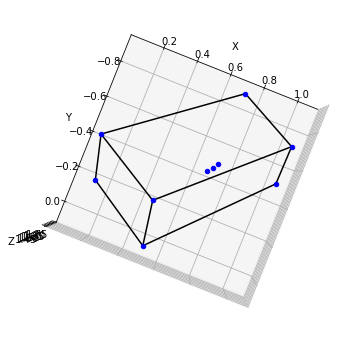

In [42]:
# TODO 5 (5 points): Compute the 4 possible camera matrices.

E = K2.T @ F @ K1
#  page 22 of 08 Two-View Geometry.pdf
U, S, Vt = np.linalg.svd(E)
W = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 1]])

R1 = U @ W @ Vt
# if UWVT < 0, W = W1 
if R1.any() < 0:
    W = -W
R1 = U @ W @ Vt
R2 = U @ W.T @ Vt
t1 = U[:, 2]
t2 = -U[:, 2]

Rt2_list = [(R1, t1), (R1, t2), (R2, t1), (R2, t2)]

print(Rt2_list)

# TODO 6 (25 points): Triangulation.
#        There is no need to use for loops when computing the reconstruction errors of pts1 (or pts2).
#        If you do, you can get at most 20 point.

def triangulate(x1, x2, P1, P2):
    #建構A
    A = np.zeros((4, 4))
    A[0] = x1[0] * P1[2] - P1[0]
    A[1] = x1[1] * P1[2] - P1[1]
    A[2] = x2[0] * P2[2] - P2[0]
    A[3] = x2[1] * P2[2] - P2[1]
    #對A進行SVD
    _, _, Vt = np.linalg.svd(A)
    X = Vt[-1]
    #正規畫
    return X / X[3]
#P1 = K1[I, 0]
P1 = K1 @ np.hstack((np.eye(3), np.zeros((3, 1))))

X_list = []

#P2 = K2[R, T]
for R, t in Rt2_list:
    P2 = K2 @ np.hstack((R, t.reshape(3, 1)))
    X = np.zeros((pts1.shape[0], 4))
    
    for i in range(pts1.shape[0]):
        X[i] = triangulate(pts1[i], pts2[i], P1, P2)
        
    X_list.append(X)
    # Find index j such that X_list[j][:,2] are all positive

for i, X in enumerate(X_list):
        if np.all(X[:, 2] > 0):
             best_idx = i
             break

X_best = X_list[best_idx]
R, t = Rt2_list[best_idx]
P2 = K2 @ np.hstack((R, t.reshape(3, 1)))



        # Display the reconstruction error for pts1 and pts2
pts1_reproj = (P1 @ X.T).T
pts1_reproj = pts1_reproj[:, :2] / pts1_reproj[:, 2:]
error_pts1 = np.mean(np.sqrt(np.sum((pts1 - pts1_reproj)**2, axis=1)))


pts2_reproj = (P2 @ X.T).T 
pts2_reproj = pts2_reproj[:, :2] / pts2_reproj[:, 2:]
error_pts2 = np.mean(np.sqrt(np.sum((pts2 - pts2_reproj)**2, axis=1)))

        
        
print(f"Error for pts1: {error_pts1:.3f}")
print(f"Error for pts2: {error_pts2:.3f}")

        





# TODO 7 (5 points): Visualize the 3D reconstruction.

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Draw the 9 points in blue
for i in range(X_best.shape[0]):
    ax.scatter(X_best[i, 0], X_best[i, 1], X_best[i, 2], color='blue')
    
# Draw the edges
edges = [[0, 1], [1, 2], [2, 3], [3, 0], [4, 5], [5, 6], [0, 4], [1, 5], [2, 6]]
for i, j in edges:
    ax.plot(X_best[[i, j], 0], X_best[[i, j], 1], X_best[[i, j], 2], color='black')
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(elev=-90, azim=-115)
plt.show()



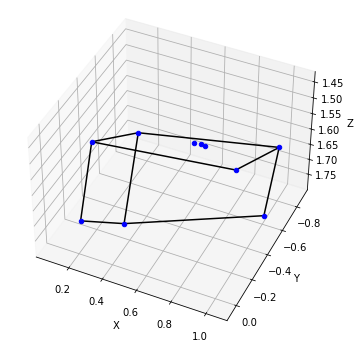

In [43]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Draw the 9 points in blue
for i in range(X_best.shape[0]):
    ax.scatter(X_best[i, 0], X_best[i, 1], X_best[i, 2], color='blue')
    
# Draw the edges
edges = [[0, 1], [1, 2], [2, 3], [3, 0], [4, 5], [5, 6], [0, 4], [1, 5], [2, 6]]
for i, j in edges:
    ax.plot(X_best[[i, j], 0], X_best[[i, j], 1], X_best[[i, j], 2], color='black')
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(elev=-139, azim=-115) 
plt.show()